In [251]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [252]:
P = np.random.randn(2, 100)
theta = np.pi/3
R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]])
t = np.array([[.5], [2]])
s = 2

Q = s*R@P + t

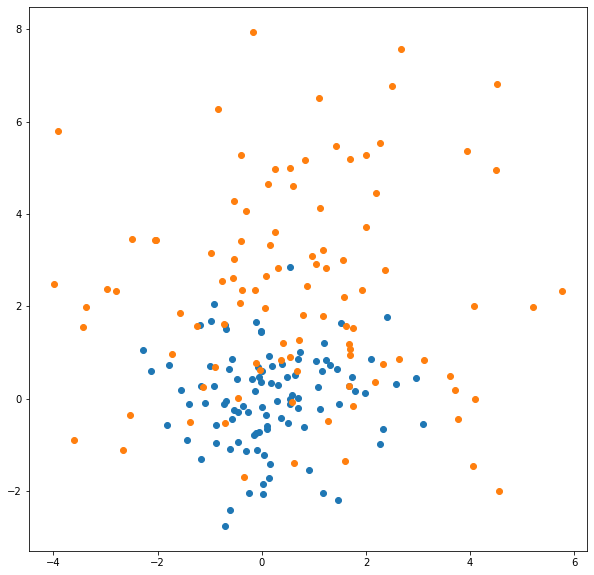

In [253]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(*P)
plt.scatter(*Q)

In [254]:
def approximate_transformation(p: np.array, q: np.array):
    sprime = np.linalg.norm(q - q.mean(axis=1, keepdims=True)).sum() / np.linalg.norm(p - p.mean(axis=1, keepdims=True)).sum()
    
    C = (q - q.mean(axis=1, keepdims=True)) @ (p - p.mean(axis=1, keepdims=True)).T
    u, _, vt = np.linalg.svd(C)
    
    Rprime = u @ vt
    Rprime = Rprime @ np.array([[1, 0], [0, np.linalg.det(Rprime)]])
    
    tprime = q.mean(axis=1, keepdims=True) - sprime * Rprime @ p.mean(axis=1, keepdims=True)

    return tprime, Rprime, sprime
    
tp, rp, sp = approximate_transformation(P, Q)
print(tp, rp, sp)

[[0.5]
 [2. ]] [[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]] 2.0000000000000004


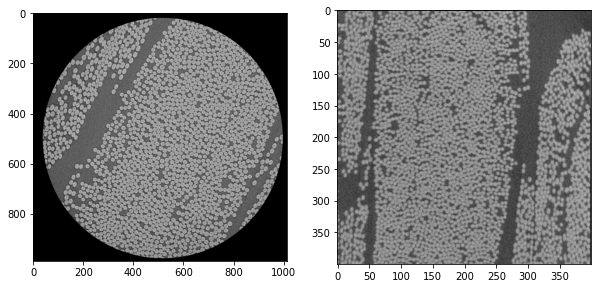

In [255]:
img1 = cv2.imread("../../data/week4/quiz_image_1.png")
img2 = cv2.imread("../../data/week4/quiz_image_2.png")
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(img1)
ax2.imshow(img2)

In [256]:
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

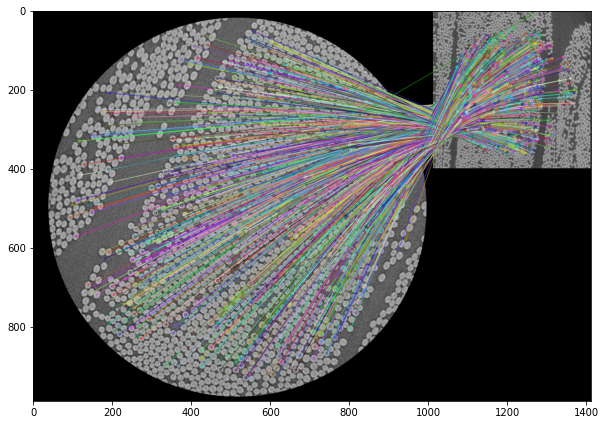

In [257]:
bf = cv2.BFMatcher()

# Apply ratio test
matches = []
threshold = .6
for m, n in bf.knnMatch(des1, des2, k=2):
    if m.distance < threshold * n.distance:
        matches.append([m])

img_compare = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, flags=2)
plt.figure(figsize=(10, 10))
plt.imshow(img_compare)

In [258]:
P = np.array([kp1[m[0].queryIdx].pt for m in matches]).T
Q = np.array([kp2[m[0].trainIdx].pt for m in matches]).T

t, r, s = approximate_transformation(P, Q)

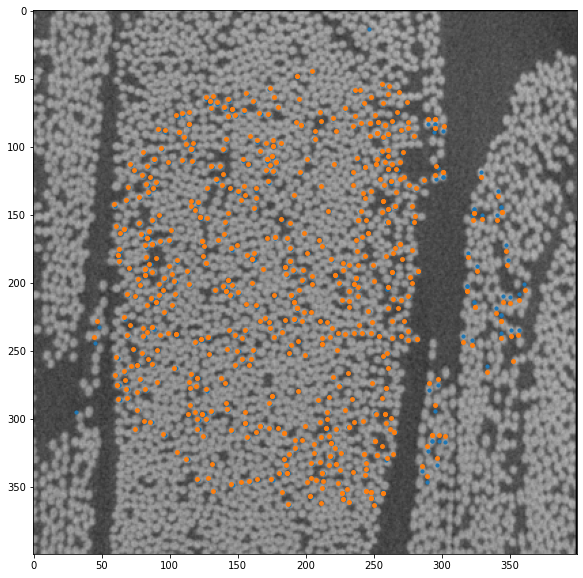

In [259]:
plt.figure(figsize=(10, 10))
plt.imshow(img2)
plt.scatter(*Q, s=10)
plt.scatter(*(s * r @ P + t), s=15)

In [271]:
print(np.linalg.norm(P.mean(1) - Q.mean(1)))
print(s, 1/s)
print(np.arccos(r))
print(np.arcsin(r))

472.4217013736698
0.3692819425836071 2.7079580252521973
[[2.74207714 1.97031184]
 [1.17128081 2.74207714]]
[[-1.17128081 -0.39951552]
 [ 0.39951552 -1.17128081]]
